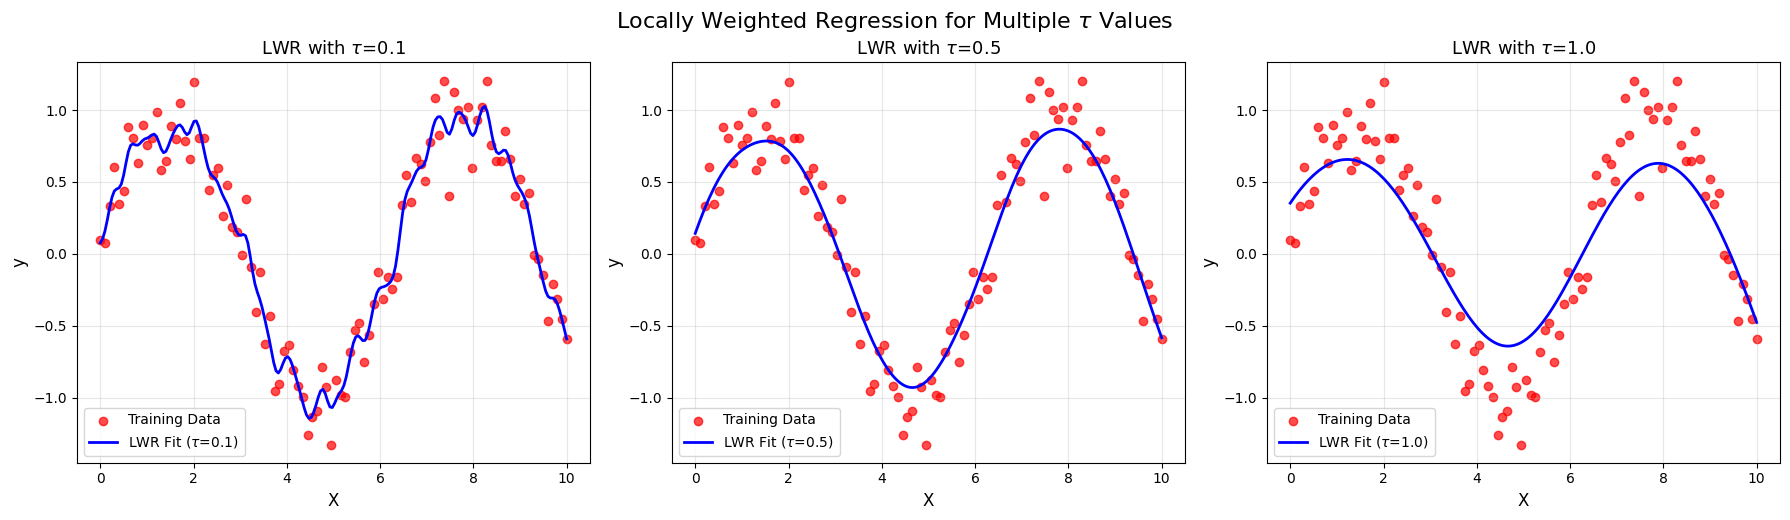

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian kernel function for weighting
def gaussian_kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))

# Locally Weighted Regression prediction for a single query point
def locally_weighted_regression(x, X, y, tau):
    m = X.shape[0]
    # Compute weights for all training points
    weights = np.array([gaussian_kernel(x, X[i], tau) for i in range(m)])
    W = np.diag(weights)
    X_transpose_W = X.T @ W
    # Compute theta using weighted least squares
    theta = np.linalg.inv(X_transpose_W @ X) @ X_transpose_W @ y
    return x @ theta

# Generate training data (0 to 10 with 0.2 noise)
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = np.sin(X) + 0.2 * np.random.randn(100)
X_bias = np.c_[np.ones(X.shape), X]

# Query points for prediction
x_test = np.linspace(0, 10, 200)
x_test_bias = np.c_[np.ones(x_test.shape), x_test]

# Tau values to compare
tau_values = [0.1, 0.5, 1.0]

plt.figure(figsize=(18, 5))

# Fit and plot LWR for each tau value
for i, tau in enumerate(tau_values):
    y_pred = np.array([locally_weighted_regression(xi, X_bias, y, tau) for xi in x_test_bias])
    plt.subplot(1, len(tau_values), i + 1)
    plt.scatter(X, y, color='red', label='Training Data', alpha=0.7)
    plt.plot(x_test, y_pred, color='blue', label=f'LWR Fit ($\\tau$={tau})', linewidth=2)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title(f'LWR with $\\tau$={tau}', fontsize=13)
    plt.legend()
    plt.grid(alpha=0.3)
plt.tight_layout()
plt.suptitle('Locally Weighted Regression for Multiple $\\tau$ Values', fontsize=16, y=1.03)
plt.show()